In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Sube el archivo CSV manualmente
from google.colab import files
uploaded = files.upload()

# Carga el dataset
df = pd.read_csv("Top 50 Fast-Food Chains in USA.csv")

# Ve las primeras filas
df.head()


Saving Top 50 Fast-Food Chains in USA.csv to Top 50 Fast-Food Chains in USA.csv


,Fast-Food Chains,U.S. Systemwide Sales (Millions - U.S Dollars),Average Sales per Unit (Thousands - U.S Dollars),Franchised Stores,Company Stores,2021 Total Units,Total Change in Units from 2020
0,Arby’s,4462,1309,2293,1116,3409,40
1,Baskin-Robbins,686,296,2317,0,2317,102
2,Bojangles,1485,1924,496,277,773,15
3,Burger King,10033,1470,7054,51,7105,24
4,Carl’s Jr.,1560,1400,1011,47,1058,-21


In [3]:
# Verifica información general y valores nulos
df.info()

# Elimina columnas irrelevantes
columns_to_drop = ['Franchised Stores']
df = df.drop(columns=columns_to_drop)

# Rellena valores nulos (si los hay)
df.fillna({"column_name": "Desconocido"}, inplace=True)

# Verifica los cambios
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Fast-Food Chains                                  50 non-null     object
 1   U.S. Systemwide Sales (Millions - U.S Dollars)    50 non-null     int64 
 2   Average Sales per Unit (Thousands - U.S Dollars)  50 non-null     int64 
 3   Franchised Stores                                 50 non-null     int64 
 4   Company Stores                                    50 non-null     int64 
 5   2021 Total Units                                  50 non-null     int64 
 6   Total Change in Units from 2020                   50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                                 

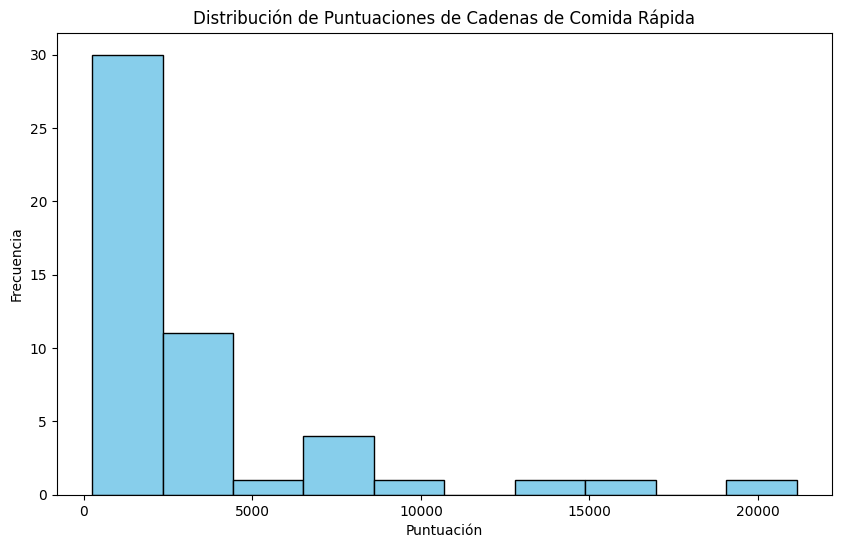

In [9]:
# Distribución de las puntuaciones de los restaurantes
plt.figure(figsize=(10,6))
plt.hist(df['2021 Total Units'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribución de Puntuaciones de Cadenas de Comida Rápida")
plt.xlabel("Puntuación")
plt.ylabel("Frecuencia")
plt.show()


# Predicción de Puntuaciones

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Variables de entrada (X) y salida (y)
X = df[['U.S. Systemwide Sales (Millions - U.S Dollars)']]
y = df['Average Sales per Unit (Thousands - U.S Dollars)']

# Divide los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hace predicciones
y_pred = model.predict(X_test)

# Evalua el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse:.2f}")


Error cuadrático medio (MSE): 524946.47
